TO-DO
    -Include keyword synonyms in TF-IDF
    -Should we stem the targets and input text?
    -POS and structure
    -The paragraphs need to be rolled up by Policy Area/Sector
    xAdd n-gram catcher (maybe replace origional text with de-spaced ngram)
    -Should script just make one large df and do lookups?  
    -Dynamic section discovery (script is able to identify Executive Summary on its own)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy import spatial
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt
% matplotlib inline
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import string
sns.set(style='darkgrid',font="calibri")
#sns.set(style="white)

stemmer = PorterStemmer()
stop = stopwords.words('english')
dir = 'C:\\Users\\Travis Park\\Google Drive\\UN\\Team MOZART RAP\\'

punct = [',','.',':',';','-']

In [2]:
def stem_text(text):
    text = text.split(' ')
    text = [stemmer.stem(word) for word in text]
    ' '.join(text)

In [3]:
SDG_Targets = pd.read_excel(dir +'SDG_test.xlsx', names = ['ID', 'Target'],sheetname = 'Sheet2')
SDG_Targets['TrimTarget'] = ''
SDG_Targets['StemTarget'] = ''

'''
r = 0
while r <len(SDG_Targets):
    SDG_Targets['Target'][r] = SDG_Targets['Target'][r].replace('\xa0',' ')
    ts = SDG_Targets['Target'][r]
    text = ts.split(' ')
    text = [stemmer.stem(word) for word in text]
    text = ' '.join(text)
    SDG_Targets['StemTarget'][r] = text
    r=r+1
    '''
SDG_Targets.head()

,ID,Target,TrimTarget,StemTarget
0,1.1,"By 2030, eradicate extreme poverty for all peo...",,
1,1.2,"By 2030, reduce at least by half the proportio...",,
2,1.3,Implement nationally appropriate social protec...,,
3,1.4,"By 2030, ensure that all men and women, in par...",,
4,1.5,"By 2030, build the resilience of the poor and ...",,


In [4]:
trimtargets = []
x = 0
while x < len(SDG_Targets):
    y = SDG_Targets['Target'][x]
    y = y.lower().replace('\xa0',' ').split(' ')
    y = ' '.join([z for z in y if z.isalpha() if z not in stop])
    for z in punct:
        y.replace(z, '')
    trimtargets.append(y)
    x=x+1
    
SDG_Targets['TrimTarget'] = trimtargets

x = 0
while x < len(SDG_Targets):
    y = SDG_Targets['TrimTarget'][x].split(' ')
    y = ' '.join([stemmer.stem(word) for word in y if word.isalpha()])
    SDG_Targets['StemTarget'][x] = y
    x=x+1
    
SDG_Targets.head()

,ID,Target,TrimTarget,StemTarget
0,1.1,"By 2030, eradicate extreme poverty for all peo...",eradicate extreme poverty people currently mea...,erad extrem poverti peopl current measur peopl...
1,1.2,"By 2030, reduce at least by half the proportio...",reduce least half proportion women children ag...,reduc least half proport women children age li...
2,1.3,Implement nationally appropriate social protec...,implement nationally appropriate social protec...,implement nation appropri social protect syste...
3,1.4,"By 2030, ensure that all men and women, in par...",ensure men particular poor equal rights econom...,ensur men particular poor equal right econom w...
4,1.5,"By 2030, build the resilience of the poor and ...",build resilience poor vulnerable situations re...,build resili poor vulner situat reduc exposur ...


In [5]:
#writes country SDG report to list 'f' split by paragraph
#WHY CANT I TAKE OUT PUNCTUATION
f = open(dir + 'Bhutan_doc_test.txt', 'r')
f = f.read().replace('. \n\n','.\n\n').replace('-',' ').replace('\x0c',' ').split('.\n\n')
f = [w.replace('\n',' ') for w in f]


for w in f:
    if len(w) <= 150:
        f.remove(w)
        
w = 0
g=f
g = [w.lower() for w in g]
for w in g:
    x = w.split(' ')
    x = ' '.join([y for y in x if y not in stop])
    x = list(x)
    x = ' '.join([y for y in x if y not in punct])
    


    
w=0
wlist=[]
while w<len(f):
    wlist.append(w)
    w=w+1

Paragraph_DF = pd.DataFrame(columns = ['Number','Text', 'TrimText','StemText'])
Paragraph_DF['Number'] = wlist
Paragraph_DF['Text'] = f
Paragraph_DF['TrimText'] = g
Paragraph_DF.head()

,Number,Text,TrimText,StemText
0,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volume...,NaN
1,1,ISBN 978 99936 55 01 5 Eleventh Five Year ...,isbn 978 99936 55 01 5 eleventh five year ...,NaN
2,2,The government has provided education to our y...,the government has provided education to our y...,NaN
3,3,The recent Rupee shortage is a serious proble...,the recent rupee shortage is a serious proble...,NaN
4,4,Eleventh Five Year Plan Main Document Vol...,eleventh five year plan main document vol...,NaN


In [6]:
r = 0
while r <len(Paragraph_DF):
    ts = Paragraph_DF['TrimText'][r]
    text = ts.split(' ')
    text = ' '.join([stemmer.stem(word) for word in text if word.isalpha()])
    Paragraph_DF['StemText'][r] = text
    r=r+1
    
Paragraph_DF.head()

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Number,Text,TrimText,StemText
0,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volume...,eleventh five year plan main document volum i ...
1,1,ISBN 978 99936 55 01 5 Eleventh Five Year ...,isbn 978 99936 55 01 5 eleventh five year ...,isbn eleventh five year plan main document vol...
2,2,The government has provided education to our y...,the government has provided education to our y...,the govern ha provid educ to our but for the n...
3,3,The recent Rupee shortage is a serious proble...,the recent rupee shortage is a serious proble...,the recent rupe shortag is a seriou i feel it ...
4,4,Eleventh Five Year Plan Main Document Vol...,eleventh five year plan main document vol...,eleventh five year plan main document volum i ...


In [7]:
len(f)

1020

In [8]:
tfidfvectorizer =TfidfVectorizer(stop_words = 'english', analyzer = 'word',lowercase = True, ngram_range=(1,3), max_df=0.9, min_df= 0.1) 

In [9]:
targets = []
b = 0
while b < len(SDG_Targets):
    targets.append(SDG_Targets['StemTarget'][b])
    b=b+1

paragraph_text = []
b=0 
while b < len(Paragraph_DF):
    paragraph_text.append(Paragraph_DF['StemText'][b])
    b=b+1

In [10]:
Paragraph_DF.head()

,Number,Text,TrimText,StemText
0,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volume...,eleventh five year plan main document volum i ...
1,1,ISBN 978 99936 55 01 5 Eleventh Five Year ...,isbn 978 99936 55 01 5 eleventh five year ...,isbn eleventh five year plan main document vol...
2,2,The government has provided education to our y...,the government has provided education to our y...,the govern ha provid educ to our but for the n...
3,3,The recent Rupee shortage is a serious proble...,the recent rupee shortage is a serious proble...,the recent rupe shortag is a seriou i feel it ...
4,4,Eleventh Five Year Plan Main Document Vol...,eleventh five year plan main document vol...,eleventh five year plan main document volum i ...


In [11]:
lentarget = len(targets)
lentarget

169

In [12]:
lenpara = len(paragraph_text)
lenpara

1020

In [13]:
all_docs = paragraph_text + targets
len(all_docs)

1189

In [14]:
x = tfidfvectorizer.fit_transform(all_docs)

In [15]:
a = pd.DataFrame(columns = ['FirstIndex','SecondIndex','Similarity'])
fi = []
si = []
simi = []

l = len(x.toarray())

r = 0 
while r < l:
    rr = 0 
    while rr < l:
        one = x[r].toarray()
        two = x[rr].toarray()
        sim = 1-spatial.distance.cosine(one,two)
        
        fi.append(r) 
        si.append(rr)
        simi.append(sim)
        rr = rr + 1
    r = r + 1
    
a['FirstIndex'] = fi
a['SecondIndex'] = si
a['Similarity'] = simi



In [18]:
b = pd.pivot_table(a, values = 'Similarity', index = ['FirstIndex'],
                  columns = 'SecondIndex')


In [19]:
z = b.ix[:lenpara-1,lenpara:]
z.columns = list(SDG_Targets['ID'])
z.reset_index(level=0, inplace=True)
z = z.drop('FirstIndex',1)
z.head()

,1.1,1.2,1.3,1.4,1.5,2.1,2.2,2.3,2.4,2.5,...,6.a,6.b,7.a,7.b,8.10,8.a,8.b,9.a,9.b,9.c
0,0.0,0.164615,0.129487,0.000000,NaN,0.097395,0.097754,0.00000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.064056,0.050387,0.044698,NaN,0.085273,0.085587,0.00000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.337963,0.265843,0.167886,NaN,0.174882,0.000000,0.10877,0.0,0.146069,...,0.0,0.0,0.147761,0.0,0.189002,0.0,0.0,0.0,0.0,0.333742
3,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.216234,0.00000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.000000,0.000000,NaN,0.086540,0.086859,0.00000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [20]:
z1=z.unstack().reset_index()
z1.columns = ['Target','Paragraph','CosineSimilarity']
z1['Target'].apply(str)
z1 = z1[(z1.CosineSimilarity >= 0.1)].sort(['Paragraph'])
z1.head()

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Target,Paragraph,CosineSimilarity
159120,5.a,0,0.134574
2040,1.3,0,0.129487
11220,3.2,0,0.141946
29580,5.4,0,0.108847
52020,9.2,0,0.105480


In [21]:
z1 = pd.merge(z1, SDG_Targets, how = 'left', left_on = 'Target',right_on='ID')
z1 = pd.merge(z1, Paragraph_DF, how = 'left', left_on = 'Paragraph', right_on = 'Number')
z1 = z1.drop('TrimTarget',1)
z1 = z1.drop('TrimText',1)
z1.sort(['Paragraph']).head()

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Target_x,Paragraph,CosineSimilarity,ID,Target_y,StemTarget,Number,Text,StemText
0,5.a,0,0.134574,5.a,Undertake reforms to give women equal rights t...,undertak reform give women equal right econom ...,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volum i ...
15,16.10,0,0.127520,16.10,Ensure public access to information and protec...,ensur public access inform protect fundament a...,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volum i ...
14,16.a,0,0.121568,16.a,"Strengthen relevant national institutions, inc...",strengthen relev nation includ intern build ca...,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volum i ...
13,1.2,0,0.164615,1.2,"By 2030, reduce at least by half the proportio...",reduc least half proport women children age li...,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volum i ...
12,11.a,0,0.191150,11.a,"Support positive economic, social and environm...",support posit social environment link rural ar...,0,Eleventh Five Year Plan Main Document Volume...,eleventh five year plan main document volum i ...


In [23]:
z1.to_csv(dir + 'TFIDF_2.csv')

In [24]:
avg = pd.pivot_table(z1, values = 'CosineSimilarity',index = 'Target_x', aggfunc='mean')
cnt = pd.pivot_table(z1, values = 'CosineSimilarity',index = 'Target_x', aggfunc='count')

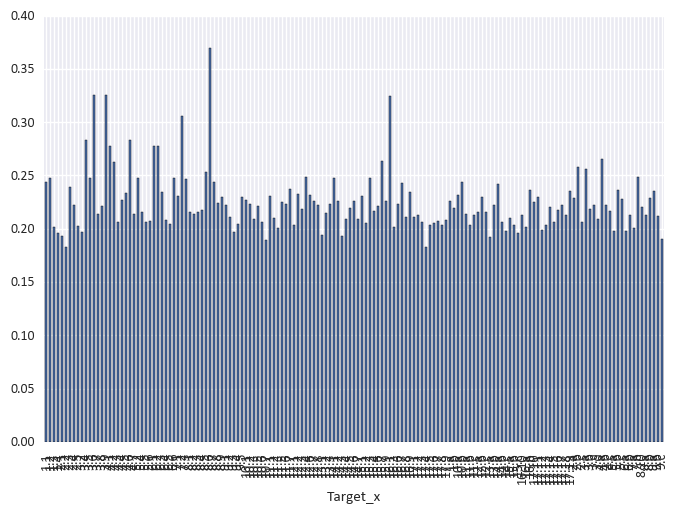

In [25]:
avg.plot(kind = 'bar');

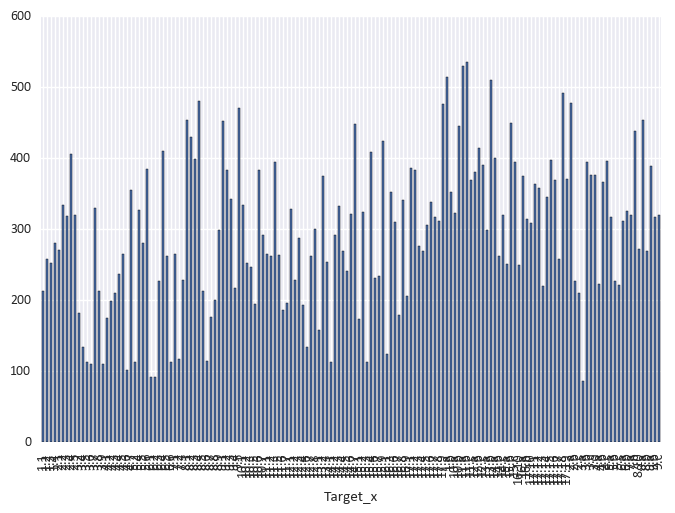

In [26]:
cnt.plot(kind = 'bar');

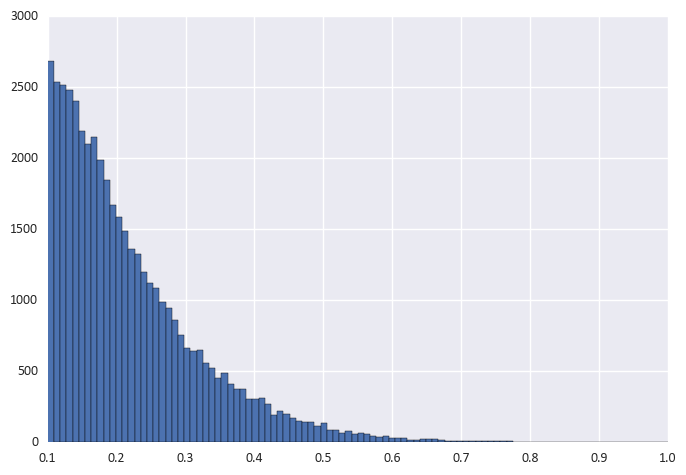

In [27]:
z1['CosineSimilarity'].hist(bins = 100);

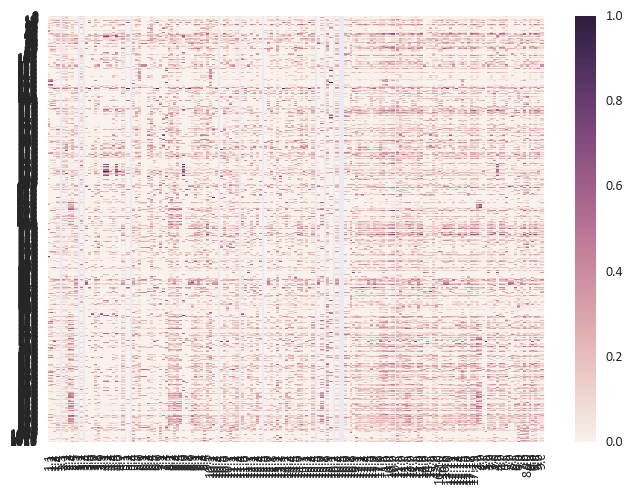

In [28]:
sns.heatmap(z);

In [29]:
top = avg.to_frame().copy()
top = top.sort('CosineSimilarity', ascending = 0).head(10)
x = list(top.index)
x

C:\Users\Travis Park\Anaconda3_1\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


[8.6, 3.9, 3.6, 16.1, 7.2, 3.4, 4.6, 4.1, 6.1, 6.2]

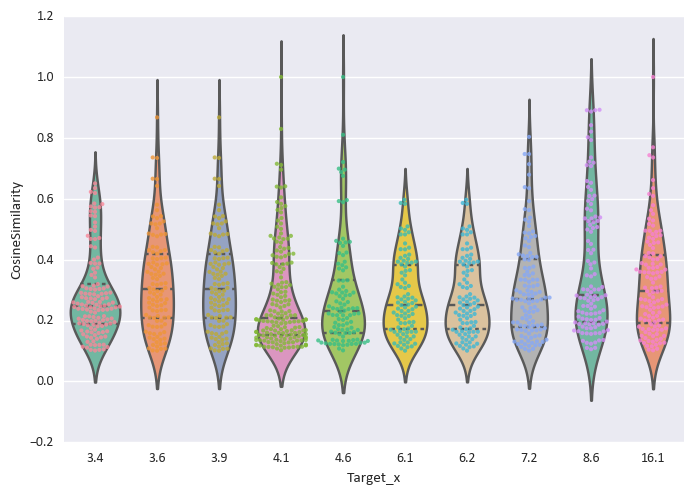

In [30]:
z2 = z1[z1['Target_x'].isin(x)]
sns.violinplot(x="Target_x", y="CosineSimilarity", data=z2, size=5,palette="Set2", inner = 'quartile')
#sns.stripplot(x="Target", y="CosineSimilarity", data=z2, jitter=0.25, size = 3, alpha = .5, palette='Red_r')
sns.swarmplot(x="Target_x", y="CosineSimilarity", data=z2, size = 3, alpha = .8);

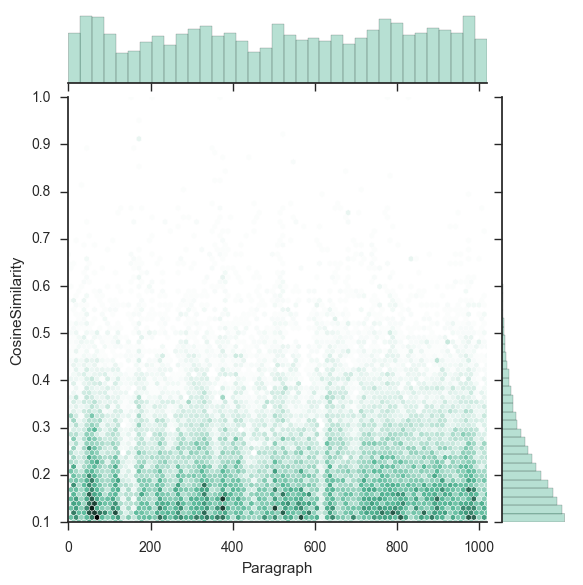

In [31]:
sns.set(style='ticks')
sns.jointplot(z1['Paragraph'], z1['CosineSimilarity'], kind = 'hex',stat_func=None, 
              color="#4CB391",edgecolor="w", xlim = (0,lenpara));

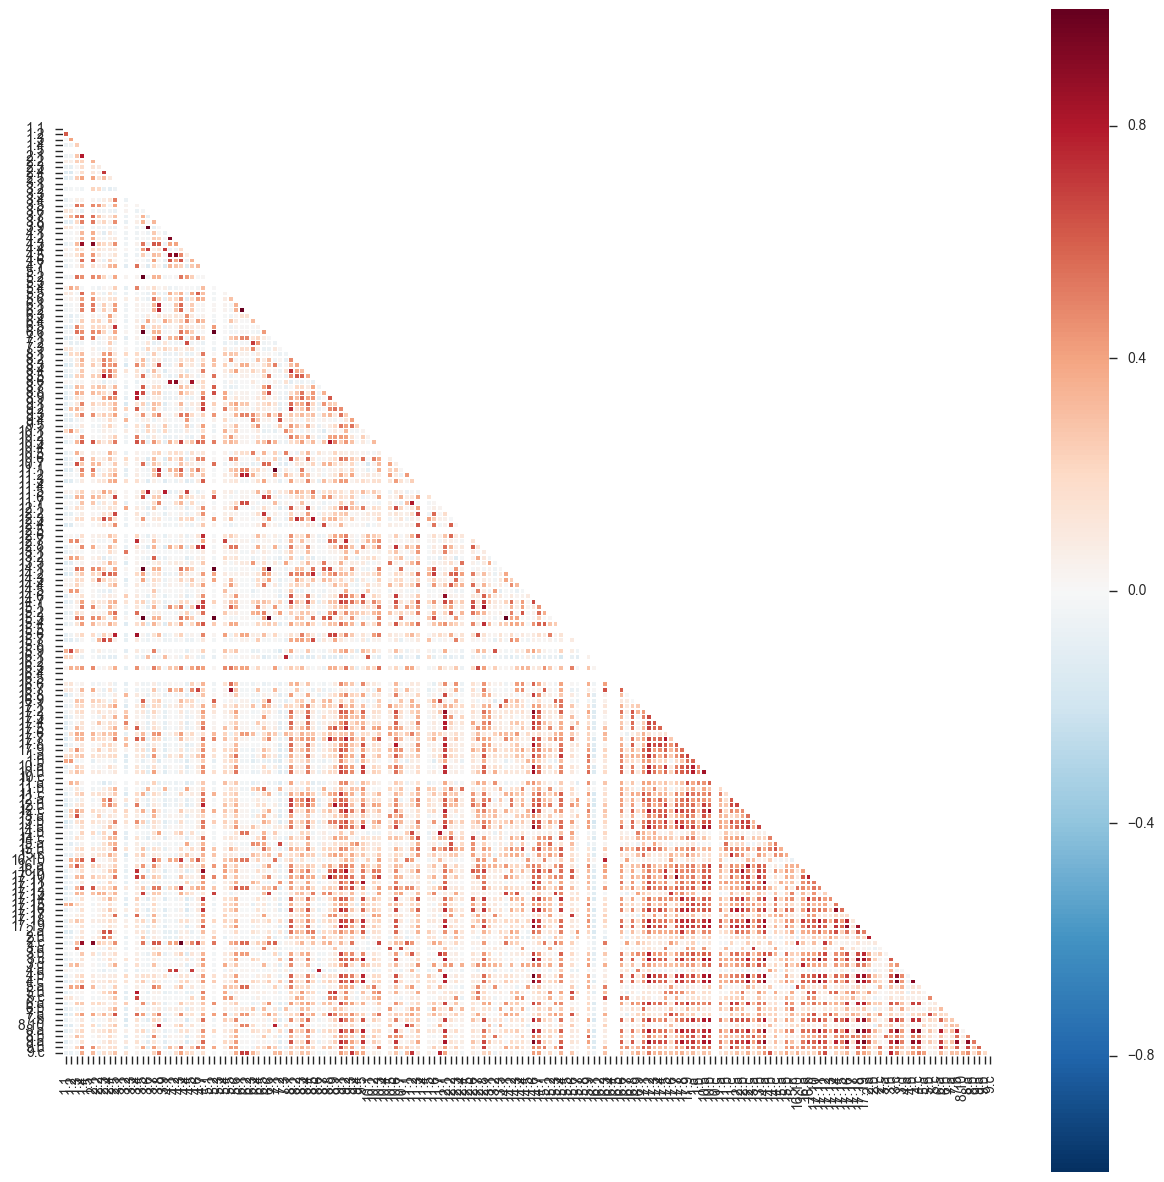

In [ ]:
corr = z.corr()
fg, ax = plt.subplots(figsize = (15,15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, linewidths = .5, square = True);

In [ ]:
z3 = z.ix[:,100:]
sns.set(style = 'darkgrid')
g = sns.PairGrid(z3)
g.map_upper(plt.scatter, s = 5)
g.map_diag(plt.hist, lw = 0, edgecolor = 'w')
g.map_lower(sns.kdeplot, cmap = 'Blues_d')

g.set(ylim = (0,None))
g.set(xlim = (0,None))